In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load Dataset

In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'fashion-mnist_train.csv'

In [3]:
train_df.shape

(60000, 785)

In [4]:
test_df.shape

(10000, 785)

In [5]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,32.830583,45.731017,52.064083,50.80245,50.459150,53.796217,51.396233,40.432733,26.083333,10.420583,4.079750,1.938183,1.177650,0.857983,0.461133,0.244300,0.092667,0.018333,0.006400,0.020617,0.098967,0.357200,0.767217,2.104583,7.331483,17.472317,32.009017,52.814583,79.349917,...,92.470233,90.523350,79.255767,62.576500,45.753283,43.970183,47.772400,38.841583,22.306933,9.280517,3.955417,0.631000,0.024633,0.218117,1.027250,4.352033,12.568183,20.847967,21.076467,17.152267,22.114933,30.559350,41.743617,51.506583,52.60855,46.479783,42.612733,45.309733,50.162100,46.438617,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,57.633860,65.964300,68.603587,67.86885,67.370188,69.467796,67.912739,62.639596,51.818389,32.591095,20.118496,13.953210,10.718718,9.256114,6.768024,4.953103,2.850576,1.232175,0.548966,1.184869,2.912779,6.523878,9.702476,15.977721,30.056073,47.953585,65.625544,82.122567,95.340204,...,100.912013,99.731484,95.172029,88.844198,78.434831,76.970849,83.212136,74.477031,55.983447,37.937984,24.953295,8.146274,0.968474,4.444904,10.030021,20.912278,36.920905,48.909477,48.263137,42.173000,48.241135,54.902062,61.963606,68.331468,69.76041,67.476669,66.267004,66.737520,68.705817,65.944847,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2

In [6]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
y_train = train_df.iloc[:,0].to_numpy()

In [11]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255

In [12]:
y_test = test_df.iloc[:,0].to_numpy()

### Visualization

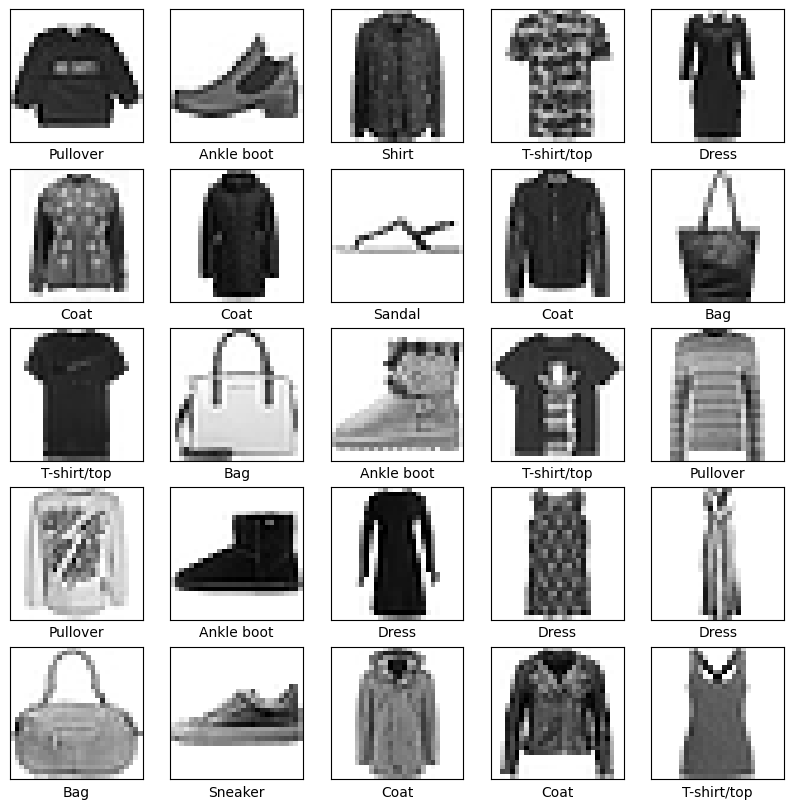

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Model Building

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.layers import BatchNormalization
import keras


In [23]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),  # Kept only 3 pooling layers
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),  # Fixed padding issue
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,490 (3.74 MB)

 Trainable params: 980,490 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
    ]
)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9410 - loss: 0.1533 - val_accuracy: 0.9283 - val_loss: 0.2013 - learning_rate: 5.0000e-04
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9429 - loss: 0.1489 - val_accuracy: 0.9289 - val_loss: 0.2081 - learning_rate: 5.0000e-04
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9463 - loss: 0.1402 - val_accuracy: 0.9278 - val_loss: 0.2048 - learning_rate: 5.0000e-04
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9468 - loss: 0.1363 - val_accuracy: 0.9294 - val_loss: 0.2036 - learning_rate: 5.0000e-04
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9513 - loss: 0.1262 - val_accuracy: 0.9313 - val_loss: 0.1993 - learning_rate: 2.5000e-04
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 99ms/step - accuracy: 0.9534 - loss: 0.1192 - val_accuracy: 0.9311 - val_loss: 0.2021 - learning_rate: 2.5000e-04
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/

In [38]:
evaluation = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9287 - loss: 0.2024


In [39]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.9344000220298767


In [40]:
y_probas = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [41]:
y_pred = y_probas.argmax(axis=-1)

In [42]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

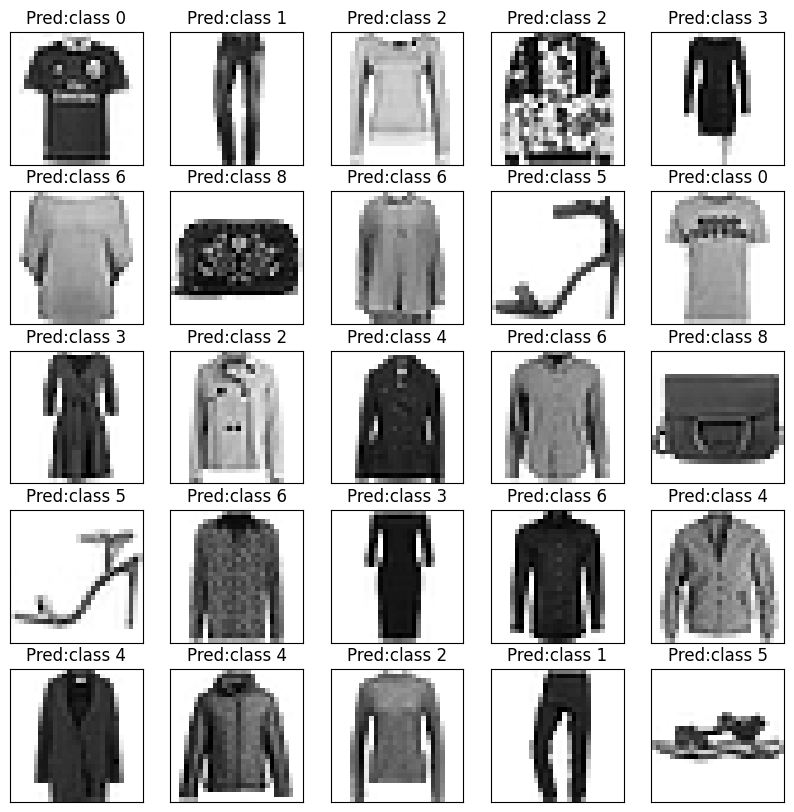

In [43]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    # plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()

In [44]:
from sklearn.metrics import classification_report

In [45]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.87      0.88      0.88      1000
     class 1       0.99      0.99      0.99      1000
     class 2       0.90      0.89      0.90      1000
     class 3       0.93      0.94      0.94      1000
     class 4       0.90      0.91      0.91      1000
     class 5       0.99      0.99      0.99      1000
     class 6       0.83      0.81      0.82      1000
     class 7       0.97      0.97      0.97      1000
     class 8       0.99      0.98      0.99      1000
     class 9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

